# Kernel Machines

## Davis SML : Lecture 11 Part 3

## Prof. James Sharpnack

### Definition: Mercer kernel

A Mercer kernel is a function $k : \mathbb R^p \times \mathbb R^p \to \mathbb R_+$ that is positive semi-definite...

for any $\{x_i\}_i \subset \mathbb R^p$ the matrix $(k(x_i,x_j))_{i,j}$ is positive semidefinite.

### Thm

Every Mercer kernel has a hi-di embedding, $\Phi : \mathbb R^p \to \ell_2$, such that
$$
k(x,x') = \langle \Phi(x), \Phi(x') \rangle
$$

### Radial Basis Function

The RBF kernel is 
$$
k(x,x') = \exp \left(- \frac{\| x - x'\|^2}{\sigma^2} \right)
$$
and the hidi embedding in 1D is
$$
\Phi(x) = e^{-x^2 / 2 \sigma^2} \left(1, \sqrt{\frac{1}{1!\sigma^2}} x, \sqrt{\frac{1}{2!\sigma^4}} x^2,\ldots\right)
$$

In [54]:
import numpy as np
import pandas as pd
import plotnine as p9
from sklearn import svm

In [92]:
n=1000
X = np.random.uniform(0,1,(n,2))
Z = np.sin(X*8) @ np.array([.5,-1])
mu = (Z > 0)

In [94]:
X_df = pd.DataFrame(X,columns=["X1","X2"])
X_df['mu'] = mu
Y = np.random.binomial(1,.6*mu+.2,size=n) > 0
X_df['Y'] = Y

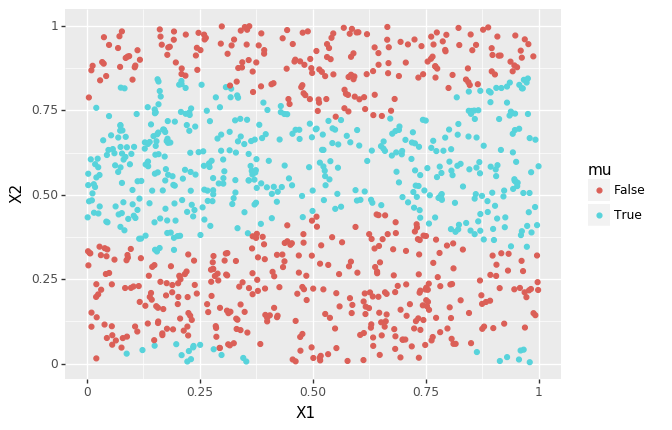

<ggplot: (8784057014181)>

In [95]:
p9.ggplot(X_df,p9.aes(x="X1",y="X2",color="mu")) + p9.geom_point()

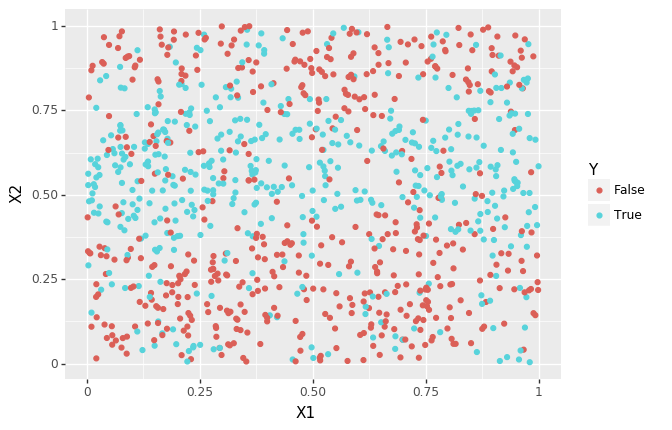

<ggplot: (8784056159437)>

In [96]:
p9.ggplot(X_df,p9.aes(x="X1",y="X2",color="Y")) + p9.geom_point()

In [107]:
svm_train = svm.SVC(kernel="linear")

svm_train.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
I = np.linspace(0,1,100)
grid = np.array([[i,j] for i in I for j in I])
mu_grid = svm_train.decision_function(grid) > 0

grid_df = pd.DataFrame(grid,columns=["X1","X2"])
grid_df["pred"] = mu_grid

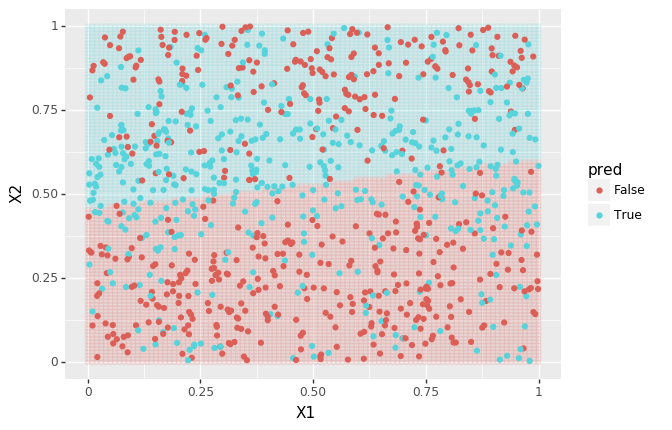

<ggplot: (8784055945725)>

In [108]:
p9.ggplot(grid_df,p9.aes(x="X1",y="X2",color="pred")) \
+ p9.geom_point(alpha=.1)\
+ p9.geom_point(p9.aes(x="X1",y="X2",color="Y"),data=X_df)

In [109]:
svm_train = svm.SVC(kernel="rbf", gamma=1.)
svm_train.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
mu_grid = svm_train.decision_function(grid) > 0

grid_df = pd.DataFrame(grid,columns=["X1","X2"])
grid_df["pred"] = mu_grid

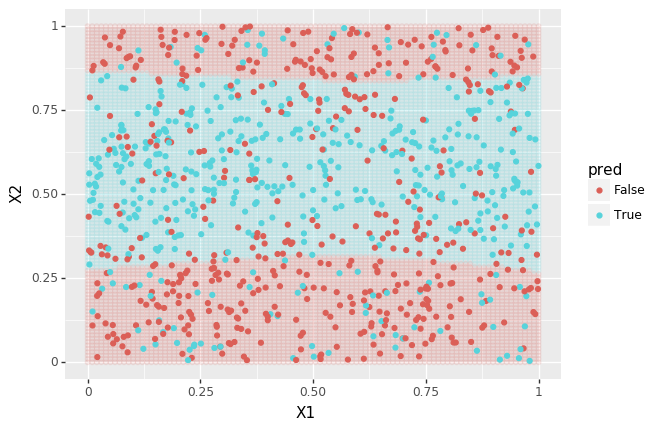

<ggplot: (8784055483793)>

In [110]:
p9.ggplot(grid_df,p9.aes(x="X1",y="X2",color="pred")) \
+ p9.geom_point(alpha=.1)\
+ p9.geom_point(p9.aes(x="X1",y="X2",color="Y"),data=X_df)

In [ ]:
svm_train = svm.SVC(kernel="rbf", gamma=5.)
svm_train.fit(X,Y)

mu_grid = svm_train.decision_function(grid) > 0

grid_df = pd.DataFrame(grid,columns=["X1","X2"])
grid_df["pred"] = mu_grid

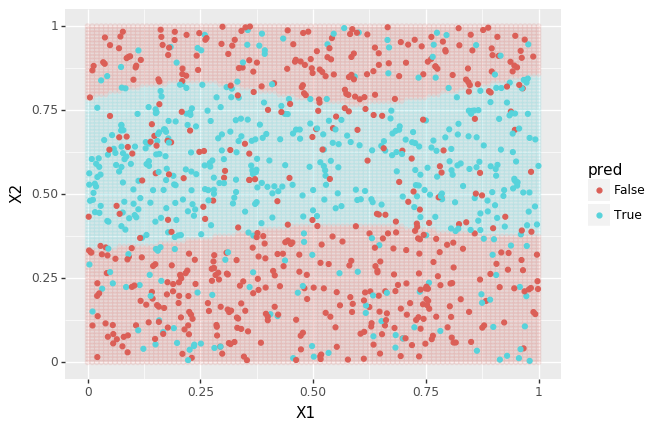

<ggplot: (8784056461533)>

In [115]:
p9.ggplot(grid_df,p9.aes(x="X1",y="X2",color="pred")) \
+ p9.geom_point(alpha=.1)\
+ p9.geom_point(p9.aes(x="X1",y="X2",color="Y"),data=X_df)

In [ ]:
svm_train = svm.SVC(kernel="rbf", gamma=5**2)
svm_train.fit(X,Y)

mu_grid = svm_train.decision_function(grid) > 0

grid_df = pd.DataFrame(grid,columns=["X1","X2"])
grid_df["pred"] = mu_grid

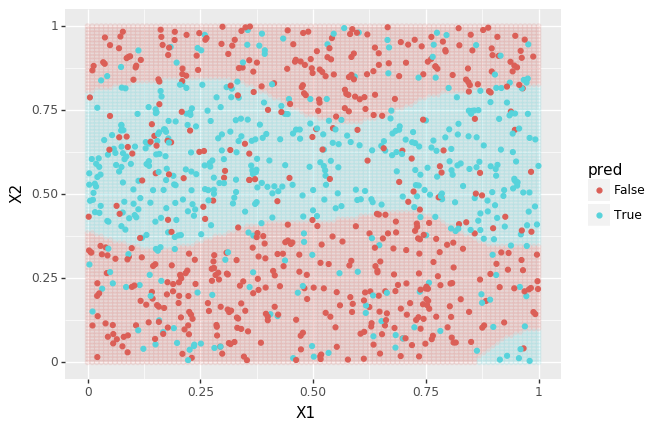

<ggplot: (8784056634609)>

In [114]:
p9.ggplot(grid_df,p9.aes(x="X1",y="X2",color="pred")) \
+ p9.geom_point(alpha=.1)\
+ p9.geom_point(p9.aes(x="X1",y="X2",color="Y"),data=X_df)

In [ ]:
svm_train = svm.SVC(kernel="rbf", gamma=5**3)
svm_train.fit(X,Y)

mu_grid = svm_train.decision_function(grid) > 0

grid_df = pd.DataFrame(grid,columns=["X1","X2"])
grid_df["pred"] = mu_grid

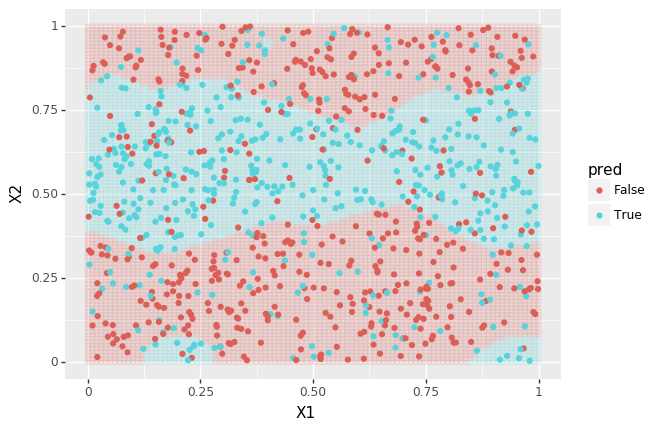

<ggplot: (8784056529361)>

In [116]:
p9.ggplot(grid_df,p9.aes(x="X1",y="X2",color="pred")) \
+ p9.geom_point(alpha=.1)\
+ p9.geom_point(p9.aes(x="X1",y="X2",color="Y"),data=X_df)

In [ ]:
svm_train = svm.SVC(kernel="rbf", gamma=5**4)
svm_train.fit(X,Y)

mu_grid = svm_train.decision_function(grid) > 0

grid_df = pd.DataFrame(grid,columns=["X1","X2"])
grid_df["pred"] = mu_grid

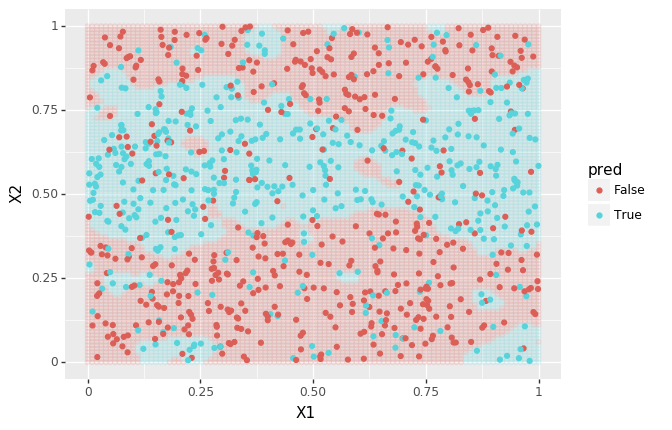

<ggplot: (8784051045801)>

In [118]:
p9.ggplot(grid_df,p9.aes(x="X1",y="X2",color="pred")) \
+ p9.geom_point(alpha=.1)\
+ p9.geom_point(p9.aes(x="X1",y="X2",color="Y"),data=X_df)

In [ ]:
svm_train = svm.SVC(kernel="rbf", gamma=5**5)
svm_train.fit(X,Y)

mu_grid = svm_train.decision_function(grid) > 0

grid_df = pd.DataFrame(grid,columns=["X1","X2"])
grid_df["pred"] = mu_grid

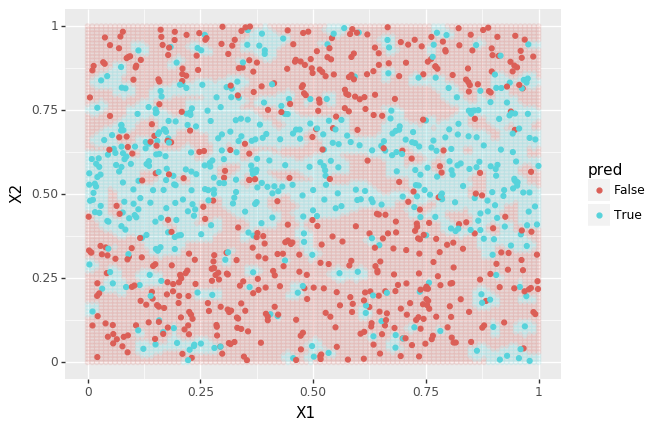

<ggplot: (8784051074509)>

In [119]:
p9.ggplot(grid_df,p9.aes(x="X1",y="X2",color="pred")) \
+ p9.geom_point(alpha=.1)\
+ p9.geom_point(p9.aes(x="X1",y="X2",color="Y"),data=X_df)